In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#from lightgbm import LGBMClassifier


In [4]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score, f1_score


In [26]:
df=pd.read_csv("/Users/ravina/Desktop/CustomerChurnPrediction/Customer-Churn-Records.csv")

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [28]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname','Complain'], axis=1)

In [29]:
#df.to_csv('customerchurn_with_necessary_features.csv',index=False)

In [30]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [31]:
X=df.drop(['Exited',],axis=1)
#X = Y.values
y = df['Exited']
print(X.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [32]:
#Split tha dataframe into categorical and numericals
def split_catg_numr(dataset):
    catg = []
    numr = []
    for i in dataset.columns:
        if len(dataset[i].unique()) > 5:
            numr.append(i)
        else:
            catg.append(i)
            
    return catg, numr
catg,numr = split_catg_numr(X)
print(catg)
print(numr)

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Satisfaction Score', 'Card Type']
['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']


In [33]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler()


numerical_transformer = StandardScaler()
categoricals= []

# Apply LabelEncoder to each categorical column
for column in catg:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    categoricals.append((column, le))

# Apply StandardScaler to numerical columns
X[numr] = numerical_transformer.fit_transform(X[numr])

# Concatenate numerical and encoded categorical columns
transformed_df = pd.concat([X[numr], X[catg]], axis=1)

transformed_df.head()


,CreditScore,Age,Tenure,Balance,EstimatedSalary,Point Earned,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Satisfaction Score,Card Type
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,-0.630839,0,0,0,1,1,1,0
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,-0.666251,2,0,0,0,1,2,0
2,-1.536794,0.293517,1.032908,1.333053,0.240687,-1.015942,0,0,2,1,0,2,0
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,-1.135457,0,0,1,0,0,4,1
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,-0.803472,2,0,0,1,1,4,1


In [34]:
target = df['Exited']

In [35]:
# Split the data into training and testing sets
x_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
x_train.shape

(7000, 13)

In [37]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are defined appropriately, apply oversampling only on the training data to avoid the data leakage.

smote = SMOTE(sampling_strategy='minority')
X_train, y_train= smote.fit_resample(x_train, Y_train)


In [38]:
X_train.shape

(11092, 13)

# Model Building without perormaing any feature engineering on the data 
we will develop different classification model and will see which one give the best results. 

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [17]:
from sklearn.metrics import precision_score,recall_score, accuracy_score, roc_auc_score,f1_score,confusion_matrix

In [39]:
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

params = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}


svc = SVC()

svc_model = GridSearchCV(estimator=svc, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
result = svc_model.fit(X_train, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (result.best_score_, result.best_params_))


Best: 0.871624 using {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,roc_auc_score

svc=SVC(C=100,gamma='auto',kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_score=roc_auc_score(y_test,y_pred)
print('Recall:', recall)
print('Precision:', precision)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2416
           1       0.48      0.57      0.52       584

    accuracy                           0.80      3000
   macro avg       0.68      0.71      0.70      3000
weighted avg       0.81      0.80      0.80      3000

Recall: 0.571917808219178
Precision: 0.47782546494992845


# AdaBoostClassifier


In [41]:
adc=AdaBoostClassifier()
adc.fit(X_train,y_train)
np.mean(cross_val_score(adc,X_train,y_train,scoring='accuracy',cv=10))


0.8250218117125241

In [42]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
params=dict()
params['n_estimators']=[50,70,100,150,200]
params['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
params['algorithm'] = ['SAMME']

adc_model=GridSearchCV(estimator=adc,param_grid=params,n_jobs=-1,scoring='accuracy',cv=5)
result=adc_model.fit(X_train,y_train)

#best score and parameters

print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.815728 using {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}


# Observation about Adaboost performance
1. Adaboost model correctly identifies about 75.6% of the customers who actually churned.
2. Aamong all the customers predicted to churn by the model, approximately 48.9% actually churned.
3. The model achieves a moderate level of accuracy, correctly predicting around 79% of the cases across both churn and non-churn classes.

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

adc=AdaBoostClassifier(algorithm='SAMME',n_estimators=200,learning_rate=0.1,)
adc.fit(X_train, y_train)
y_pred = adc.predict(X_test)

print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
print('Precision:', precision)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2416
           1       0.47      0.70      0.56       584

    accuracy                           0.79      3000
   macro avg       0.69      0.75      0.71      3000
weighted avg       0.83      0.79      0.80      3000

Recall: 0.6952054794520548
Precision: 0.4666666666666667


# DecisionTreeClassifier 

In [44]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Define parameters for GridSearchCV
params = {
    'criterion':['gini','entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
dtc_model = GridSearchCV(estimator=dtc, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5)
result = dtc_model.fit(X_train, y_train)

# Print best score and parameters
print("Best: %f using %s" % (result.best_score_, result.best_params_))


Best: 0.821228 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Observation about the performance of Decision Tree classifier
1. Identified approximately 77.6% of the actual positive cases correctly.
2. Out of all the cases the classifier labeled as positive, approximately 48.9.06% were actually positive.
3. Accuracy indicates classifier correctly predicted 79% of the cases in the dataset.


Decision Tree and AdaboostClassifier nearly gave same results.

In [46]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=1,min_samples_split=2,random_state=42)
dtc.fit(X_train, y_train)
y_pred = adc.predict(X_test)

print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
print('Precision:', precision)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2416
           1       0.47      0.70      0.56       584

    accuracy                           0.79      3000
   macro avg       0.69      0.75      0.71      3000
weighted avg       0.83      0.79      0.80      3000

Recall: 0.6952054794520548
Precision: 0.4666666666666667


# RandomForestClassifier

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

parameters = {
              "n_estimators":[50,70,80,100,120],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
#gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest = GridSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print("Best: %f using %s" % (gridRandomForest.best_score_, gridRandomForest.best_params_))
print('n_estimators: ',gridRandomForest.best_estimator_.n_estimators)
print('criterion: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Min Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max depth: ', gridRandomForest.best_estimator_.max_depth)


Best: 0.857921 using {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 3, 'n_estimators': 120}
n_estimators:  120
criterion:  gini
Score:  0.8579209149931062
Min Split:  3
Max depth:  11


In [48]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=120, random_state=42,class_weight='balanced',max_depth=11,min_samples_split=3,criterion='gini')

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.818
Confusion Matrix:
[[2066  350]
 [ 196  388]]


In [49]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

random_forest = RandomForestClassifier(n_estimators = 120, min_samples_split = 3, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
print('Precision:', precision)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2416
           1       0.53      0.66      0.59       584

    accuracy                           0.82      3000
   macro avg       0.72      0.76      0.74      3000
weighted avg       0.84      0.82      0.83      3000

Recall: 0.660958904109589
Precision: 0.5280437756497948


In [50]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp_random

Age                   0.280689
NumOfProducts         0.175543
IsActiveMember        0.099721
Balance               0.091529
Point Earned          0.056789
EstimatedSalary       0.053762
CreditScore           0.051191
Tenure                0.050552
Gender                0.049297
Geography             0.036347
Satisfaction Score    0.022748
Card Type             0.020677
HasCrCard             0.011155
dtype: float64

In [51]:
feature_importances = random_forest.feature_importances_

# Select top N features
top_features = X.columns[np.argsort(feature_importances)[::-1][:10]]
top_features

Index(['Age', 'NumOfProducts', 'IsActiveMember', 'Balance', 'Point Earned',
       'EstimatedSalary', 'CreditScore', 'Tenure', 'Gender', 'Geography'],
      dtype='object')

In [52]:
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1],
              'max_depth': [1 , 2, 3, 4, 5, 6],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7],
              'reg_alpha': [0.1, 0.3, 0.5],
              'reg_lambda': [0.1, 0.3, 0.5]
             }

model = XGBClassifier()
xgb_grid =RandomizedSearchCV(model,parameters, cv = 2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

print('Score: ', xgb_grid.best_score_)
print('Params: ', xgb_grid.best_params_)

Score:  0.8562928236566896
Params:  {'subsample': 0.9, 'reg_lambda': 0.3, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}


In [53]:
xgb = XGBClassifier(subsample = 0.9, reg_lambda = 0.3, reg_alpha = 0.1, n_estimators = 500, min_child_weight = 5, max_depth = 6, learning_rate = 0.1, gamma = 0.1, colsample_bytree = 0.5, random_state = 0)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
print('Precision:', precision)



              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2416
           1       0.65      0.57      0.60       584

    accuracy                           0.86      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.85      0.86      0.85      3000

Recall: 0.565068493150685
Precision: 0.6470588235294118


# The accuracy here at XGB is also good, but same problem, the model learned a lot the negative result not the positive one. Therefore let's take random forest model as final model.

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# X contains your feature matrix and y contains your target variable
scaler = MinMaxScaler()

# Apply Min-Max scaling to your feature matrix to make all the values positive
X_scaled = scaler.fit_transform(X)

# Perform feature selection using chi-squared test
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X_scaled, y)

# Retrieve feature scores and sort them
feature_scores = pd.DataFrame(data=fit.scores_, index=list(X.columns), columns=['Chi Squared Score']) 
feature_scores_sorted = feature_scores.sort_values(by='Chi Squared Score', ascending=False).round(2)

In [56]:
feature_scores_sorted

,Chi Squared Score
IsActiveMember,118.54
Age,57.82
Gender,51.30
Balance,28.52
Geography,5.85
NumOfProducts,4.82
CreditScore,0.45
Card Type,0.33
Tenure,0.31
EstimatedSalary,0.26


# Feature Engineering And Feature Selection
1. more insights can be driven by creating new features
2. new features can help in predicting the possible churner more accuratly



In [57]:
import pandas as pd

In [5]:
df=pd.read_csv("/Users/ravina/Desktop/CustomerChurnPrediction/Customer-Churn-Records.csv")

In [59]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
X=df.drop(['Exited','Complain','RowNumber', 'CustomerId', 'Surname'],axis=1)
#X = Y.values
y = df['Exited']
print(X.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [7]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,3,DIAMOND,456


In [10]:
X['sufficient_balance'] = (X.EstimatedSalary - X.Balance).apply(lambda x: 0 if x >= 0 else 1)


In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,sufficient_balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,2,DIAMOND,464,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,3,DIAMOND,456,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,3,DIAMOND,377,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,5,GOLD,350,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,5,GOLD,425,1


In [12]:
X["is_CreditScore_low"] = X.CreditScore.apply(lambda x : 1 if x < 400 else 0)

In [13]:
X.drop(columns=['Point Earned','Satisfaction Score','Card Type'],inplace=True)

In [14]:
# we saw from EDA x['Age] is right skewwd, therefore apply log transformation.
X['Age'] = np.log1p(X.Age)

In [15]:
X.shape

(10000, 12)

In [16]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'sufficient_balance', 'is_CreditScore_low'],
      dtype='object')

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  float64
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  sufficient_balance  10000 non-null  int64  
 11  is_CreditScore_low  10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [18]:
#Split tha dataframe into categorical and numericals
def split_catg_numr(dataset):
    catg = []
    numr = []
    for i in dataset.columns:
        if len(dataset[i].unique()) > 5:
            numr.append(i)
        else:
            catg.append(i)
            
    return catg, numr
catg,numr = split_catg_numr(X)

In [19]:
print(catg)
print(numr)

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'sufficient_balance', 'is_CreditScore_low']
['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [21]:
X= X[catg + numr]

In [22]:


numerical_transformer = StandardScaler()
categoricals= []

# Apply LabelEncoder to each categorical column
for column in catg:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    categoricals.append((column, le))

# Apply StandardScaler to numerical columns
X[numr] = numerical_transformer.fit_transform(X[numr])

# Concatenate numerical and encoded categorical columns
transformed_df = pd.concat([X[numr], X[catg]], axis=1)

transformed_df.head()



,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,sufficient_balance,is_CreditScore_low
0,-0.326221,0.423222,-1.041760,-1.225848,0.021886,0,0,0,1,1,0,0
1,-0.440036,0.329713,-1.387538,0.117350,0.216534,2,0,0,0,1,0,0
2,-1.536794,0.423222,1.032908,1.333053,0.240687,0,0,2,1,0,1,0
3,0.501521,0.135823,-1.387538,-1.225848,-0.108918,0,0,1,0,0,0,0
4,2.063884,0.514581,-1.041760,0.785728,-0.365276,2,0,0,1,1,1,0


#Select the best categorical features using chi sqaure test

In [23]:
features = transformed_df.loc[:,catg]

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

In [25]:
target = df['Exited']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

In [26]:
featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']).sort_values(ascending = False,by = ["Chi Squared Score"])
featureScores

,Chi Squared Score
IsActiveMember,118.543911
is_CreditScore_low,74.228656
Gender,51.302173
sufficient_balance,27.782900
NumOfProducts,14.462867
Geography,11.701739
HasCrCard,0.143320


#Credit card doesn't have much imapact on churn, therefore let's drop this feature.

In [27]:
transformed_df.drop(columns = ["HasCrCard"],inplace = True)


In [28]:
transformed_df.head(2)

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography,Gender,NumOfProducts,IsActiveMember,sufficient_balance,is_CreditScore_low
0,-0.326221,0.423222,-1.041760,-1.225848,0.021886,0,0,0,1,0,0
1,-0.440036,0.329713,-1.387538,0.117350,0.216534,2,0,0,1,0,0


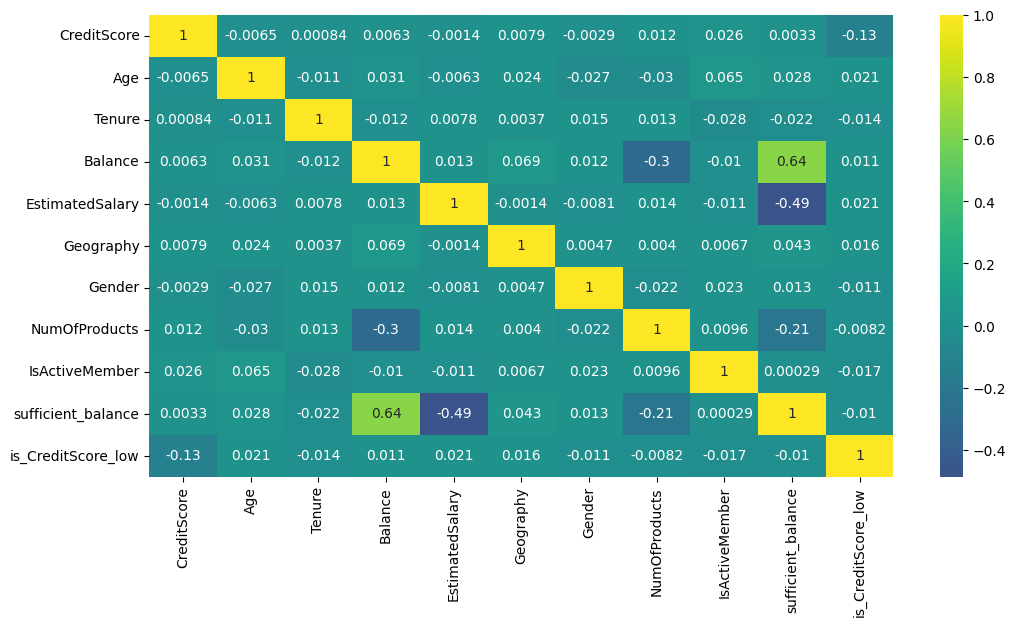

In [29]:
cor = transformed_df.corr()
plt.figure(figsize= (12,6))
sns.heatmap(cor, annot = True, fmt=".2g",cmap = 'viridis', center = 0)
plt.show()

#  Oversampling using Smote

In [30]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are defined appropriately



In [31]:
from sklearn.model_selection import KFold
fold = KFold(n_splits = 5, shuffle = True, random_state = 3)

In [47]:

x_train, x_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8000, 12), (8000,), (2000, 12), (2000,))

In [48]:
smote = SMOTE(sampling_strategy='minority')
X_train, y_train= smote.fit_resample(x_train,y_train)
y_train.value_counts()


Exited
0    6345
1    6345
Name: count, dtype: int64

In [34]:
# Base Estimators
mods = [XGBClassifier( random_state=0), CatBoostClassifier(verbose=False), RandomForestClassifier( random_state=0)]

# Define the number of folds for cross-validation
fold = KFold(n_splits=5, shuffle=True, random_state=42)

def get_cv_Scores(models, X_train, y_train, cv):
    scores = {}
    for model in models:
        cvscore = cross_val_score(model, X, y, cv=cv, verbose=0)
        scores[str(model)[:10]] = np.mean(cvscore)
    return pd.DataFrame(data=scores, index=["Accuracy CV"])

# Assuming X and y are defined appropriately
cv_sc = get_cv_Scores(mods, x_test, y_test, fold)
print(cv_sc)

             XGBClassif  <catboost.  RandomFore
Accuracy CV      0.8531      0.8637      0.8603


In [90]:
def get_scores(models):
    prediction_results = {}
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(x_test)
        recall = recall_score(y_pred,y_test)
        precision = precision_score(y_pred,y_test)
        accuracy = accuracy_score(y_pred,y_test)
        roc = roc_auc_score(y_pred,y_test)
        f1 = f1_score(y_pred,y_test)
        prediction_results[str(model)[:10]] = [accuracy,precision,recall,roc,f1]
    results_df = pd.DataFrame(data = prediction_results, index = ["Accuracy", "Precision", "Recall","ROC-AUC","F1"])
    return results_df

predictions = get_scores(mods)
results_f = pd.concat([cv_sc,predictions])
results_f.style.highlight_max(axis=1,color = 'lightgreen')

,XGBClassif,<catboost.,RandomFore
Accuracy CV,0.853100,0.863700,0.860300
Accuracy,0.845000,0.854500,0.834500
Precision,0.509138,0.503916,0.540470
Recall,0.615142,0.656463,0.571823
ROC-AUC,0.751718,0.772545,0.732188
F1,0.557143,0.570162,0.555705


In [91]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1],
              'max_depth': [1 , 2, 3, 4, 5, 6],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7],
              'reg_alpha': [0.1, 0.3, 0.5],
              'reg_lambda': [0.1, 0.3, 0.5]
             }

model = XGBClassifier()
xgb_grid =RandomizedSearchCV(model,parameters, cv = 2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

print('Score: ', xgb_grid.best_score_)
print('Params: ', xgb_grid.best_params_)

Score:  0.8617809298660362
Params:  {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 0.3, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


# performance of XgBoost on training and test data set 

In [95]:
# Performance on training dataset 

model=XGBClassifier(subsample= 0.9, reg_lambda= 0.5, reg_alpha= 0.3, n_estimators= 500, min_child_weight= 1, max_depth= 3, learning_rate= 0.1, gamma= 0.1, colsample_bytree= 0.7)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
print("Model performance on training data: \n",classification_report(y_train, y_pred_train))

precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
print('Recall_of_train:', recall)
print('Precision_of_train:', precision)

Model performance on training data: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6345
           1       0.94      0.88      0.91      6345

    accuracy                           0.91     12690
   macro avg       0.91      0.91      0.91     12690
weighted avg       0.91      0.91      0.91     12690

Recall_of_train: 0.8830575256107172
Precision_of_train: 0.9358610322365124


In [96]:
#Performance on test data 

model=XGBClassifier(subsample= 0.9, reg_lambda= 0.5, reg_alpha= 0.3, n_estimators= 500, min_child_weight= 1, max_depth= 3, learning_rate= 0.1, gamma= 0.1, colsample_bytree= 0.7)
model.fit(X_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
print('Precision:', precision)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score is:",roc_auc)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1617
           1       0.61      0.52      0.56       383

    accuracy                           0.84      2000
   macro avg       0.75      0.72      0.73      2000
weighted avg       0.84      0.84      0.84      2000

Recall: 0.5221932114882507
Precision: 0.6116207951070336
ROC_AUC Score is: 0.7218263521881574


In [97]:
parameters = {
              "n_estimators":[50,70,80,100,120],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier( random_state=0)
#gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest = GridSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print("Best: %f using %s" % (gridRandomForest.best_score_, gridRandomForest.best_params_))
print('n_estimators: ',gridRandomForest.best_estimator_.n_estimators)
print('criterion: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Min Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max depth: ', gridRandomForest.best_estimator_.max_depth)




Best: 0.864697 using {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 100}
n_estimators:  100
criterion:  gini
Score:  0.8646966115051221
Min Split:  2
Max depth:  11


# performance of RandomForestClassifier on training and test data set 

In [99]:
#Performance on training dataset

random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
y_pred_train = random_forest.predict(X_train)

print("Model performance on training data:",classification_report(y_train, y_pred_train))

precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
print('Recall:', recall)
print('Precision:', precision)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score is:",roc_auc)

Model performance on training data:               precision    recall  f1-score   support

           0       0.94      0.92      0.93      6345
           1       0.92      0.94      0.93      6345

    accuracy                           0.93     12690
   macro avg       0.93      0.93      0.93     12690
weighted avg       0.93      0.93      0.93     12690

Recall: 0.9366430260047282
Precision: 0.9245488487865589
ROC_AUC Score is: 0.7218263521881574


In [100]:
#Performance on test dataset 

random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 3, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
print('Precision:', precision)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score is:",roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1617
           1       0.54      0.59      0.57       383

    accuracy                           0.83      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.83      0.83      2000

Recall: 0.5926892950391645
Precision: 0.5417661097852029
ROC_AUC Score is: 0.7369754452932372


# Random forest provide better result in terms of f1-score and roc auc. therefore I will select randomforest for prediction tasks.

In [36]:
X.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,sufficient_balance,is_CreditScore_low,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,France,Female,1,1,1,0,0,619,3.761200,2,0.00,101348.88
1,Spain,Female,1,0,1,0,0,608,3.737670,1,83807.86,112542.58
2,France,Female,3,1,0,1,0,502,3.761200,8,159660.80,113931.57
3,France,Female,2,0,0,0,0,699,3.688879,1,0.00,93826.63
4,Spain,Female,1,1,1,1,0,850,3.784190,2,125510.82,79084.10


In [1]:
X.drop(columns=['HasCrCard'],inplace=True)
#X.head()
final_data=pd.concat([X,df['Exited']],axis=1)
#pd.concat([X[numr], X[catg]], axis=1)


# final_data set after feature engineering, feature transformation and feature selection.

In [59]:

final_data.to_csv("feature_engineered_bankchurn_data.csv", index=False)

In [35]:
df=pd.read_csv("/Users/ravina/Desktop/CustomerChurnPrediction/research/feature_engineered_bankchurn_data.csv")
df.head(2)

,Geography,Gender,NumOfProducts,IsActiveMember,sufficient_balance,is_CreditScore_low,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
0,France,Female,1,1,0,0,619,3.76120,2,0.00,101348.88,1
1,Spain,Female,1,1,0,0,608,3.73767,1,83807.86,112542.58,0


# Prediction using neural networks

In [39]:
import tensorflow as tf 
from tensorflow.keras import layers, models

In [42]:
X_train.shape

(12690, 12)

In [49]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2) 

# Initializing the neural network

In [97]:

# defining architecture of the neural network, input_shape=(784,)
model = models.Sequential([
    layers.Dense(7, activation='relu'),  
    layers.Dense(7, activation='relu'),
    #layers.Dense(7, activation='relu'),  
    layers.Dense(1, activation='sigmoid') 
])


model.compile(optimizer='adam',  
              loss='binary_crossentropy',  
              metrics=['accuracy'])  # Monitor accuracy during training

# Display the architecture of the model
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [98]:
# training the neural network

history=model.fit(x_train,y_train,batch_size=32, epochs=100,validation_data=(x_val, y_val))

Epoch 1/100


298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5367 - loss: 0.6825 - val_accuracy: 0.6899 - val_loss: 0.6271
Epoch 2/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.6837 - loss: 0.6164 - val_accuracy: 0.7097 - val_loss: 0.5831
Epoch 3/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.7112 - loss: 0.5770 - val_accuracy: 0.7236 - val_loss: 0.5484
Epoch 4/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.7276 - loss: 0.5492 - val_accuracy: 0.7372 - val_loss: 0.5238
Epoch 5/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.7412 - loss: 0.5210 - val_accuracy: 0.7413 - val_loss: 0.5060
Epoch 6/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7523 - loss: 0.5062 - val_accuracy: 0.7532 - val_loss: 0.4927
Epoch 7/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.7513 - loss: 0.4995 - val_accuracy: 0.7567 - val_loss: 0.4828
Epoch 8/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.7637 - loss: 0.4859 - val_ac

In [99]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']



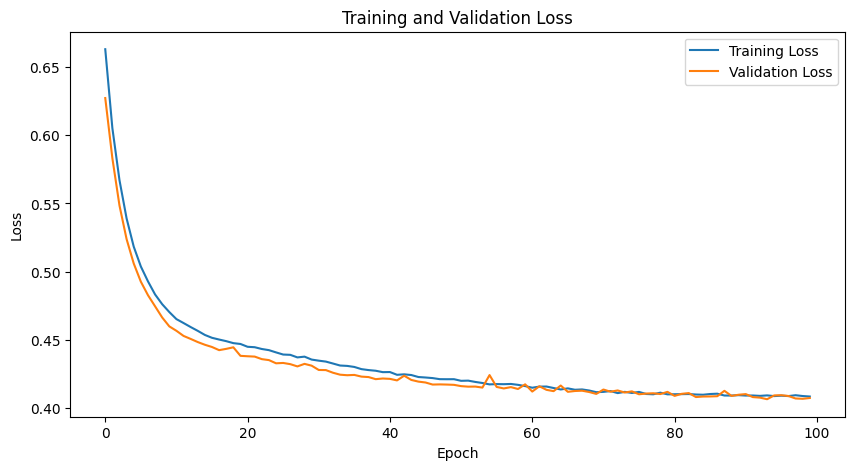

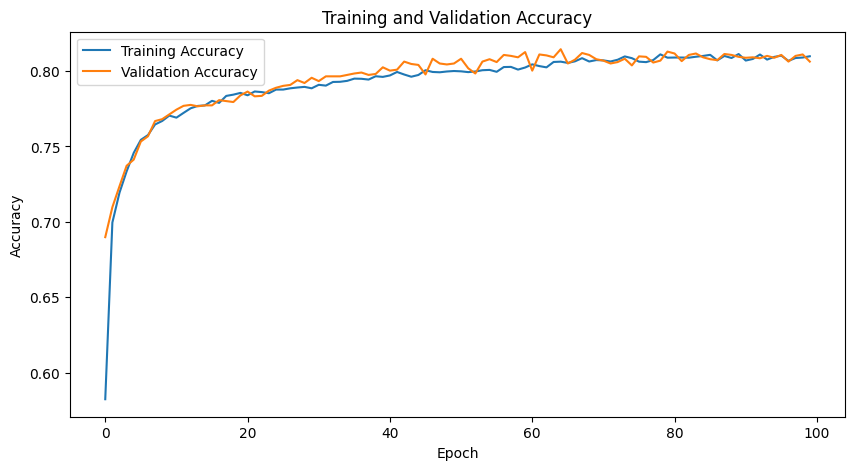

In [100]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [101]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
#print(model.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


In [102]:
from sklearn.metrics import confusion_matrix
score = confusion_matrix(y_test, y_pred)
print(score)

[[1373  244]
 [ 138  245]]


In [103]:

print(classification_report(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
print('Precision:', precision)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score is:",roc_auc)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1617
           1       0.50      0.64      0.56       383

    accuracy                           0.81      2000
   macro avg       0.70      0.74      0.72      2000
weighted avg       0.83      0.81      0.82      2000

Recall: 0.639686684073107
Precision: 0.5010224948875256
ROC_AUC Score is: 0.7443949808739067
